# 匯入一些套件還有匯入文檔

In [63]:
%pylab inline
import time
import re
import matplotlib.pyplot as plt
import pandas as pd
import string
import codecs
import os
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn import naive_bayes as bayes
from sklearn.model_selection import train_test_split
#簡轉繁
from hanziconv import HanziConv

#ham與spam的每封郵件list
ham_text = []
spam_text = []
#ham與spam的數據集
ham_data = []
spam_data = []
#取得目前工作目錄
SaveDirectory = os.getcwd() 
#獲得文檔列表
listham = os.listdir(SaveDirectory+'\\data\\normal')
listspam = os.listdir(SaveDirectory+'\\data\\spam')
#數據集數量

print('spam total：',len(listspam))
print('ham total：',len(listham))


Populating the interactive namespace from numpy and matplotlib
spam total： 7775
ham total： 7063


C:\Users\zxc98\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['logistic', 'f', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 先匯入HAM文檔並給予label = 0

In [64]:
for fileName in listham:
        with open('data/normal/'+fileName, 'r',encoding='gbk') as f:
            #文本每一列儲存
            text=[]
            # 過濾非中文字符，正規化
            for line in f.readlines():
                pattern = re.compile('[^\u4e00-\u9fa5]') #正規化(去除非中文字符)
                line = pattern.sub("", line) #將其他字符取代為""
                content = line.strip().split() #去除一些空白.換行
                text = text+content #儲存這個文本的內容
            text = " ".join(text) #將文本內容list加入全部文本的list
            ham_text.append(HanziConv.toTraditional(text)) #簡轉繁
ham_data = pd.DataFrame(ham_text,columns=['text']) #將list改成dataframe
ham_data['label']='0' #將資料類別加上 0:ham 1:spam
ham_data.head()


,text,label
0,這事兒還有續集 因為我姐她們買房子後來裝修的時候沒錢她婆婆他們就贊助瞭萬塊 這下一吵她婆婆就...,0
1,越發覺得這個姐夫不錯瞭 那萬還是趕緊還瞭吧 標題姐姐快要生孩子瞭很感慨 發信站水木社區站內 ...,0
2,或許某些農村吧 在一個當性彆勞動力富裕程度的地方還是可以理解的 標題姐姐快要生孩子瞭很感慨 ...,0
3,最近經常看到你說一些很武斷的話 所謂保胎確實是要躺在床上不能動的尤其是先兆流産有齣血的時候 ...,0
4,他們分手是說性格不閤 沒多久然後我們交往 還算比較愉快 當初因為他經常和聯係我曾跟他吵過多次...,0


# 先匯入SPAM文檔並給予label = 1

In [65]:
for fileName in listspam:
        with open('data/spam/'+fileName, 'r',encoding='gbk') as f:
            text=[]
            # 过滤掉非中文字符
            for line in f.readlines():
                pattern = re.compile('[^\u4e00-\u9fa5]')
                line = pattern.sub("", line)
                content = line.strip().split()
                text = text+content
            text = " ".join(text)
            spam_text.append(HanziConv.toTraditional(text))
spam_data = pd.DataFrame(spam_text,columns=['text'])
spam_data['label']='1'
spam_data.head()

,text,label
0,會員注冊邀請書 全國最低價域名空間大放送 國際頂級域名注冊驚暴價元年元年連續注冊年以上 國傢...,1
1,你好 以茶會友以茶聯誼喝茶就喝安溪鐵觀音 本廠是專業生産批發各等級鐵觀音茶葉的購買聯係 在綫...,1
2,尊敬的先生小姐 您好 首先感謝您抽時間查看以下信息 我公司一直緻力於研發生産銷售施工環氧樹脂...,1
3,先生 你好 批發麻醉藥催情藥墮胎藥避孕藥飲料型噴霧型香煙型揮發型等各類國際國內製藥企業推齣的...,1
4,貴公司負責人經理財務您好 我是深圳市創偉實業有限公司的我司實力雄厚有著良 好的社會關係也有部...,1


# 把匯入的 SPAM與HAM結合並打亂

In [66]:
all_data = pd.concat([spam_data,ham_data],axis=0, ignore_index=True)  #將ham lsit與spam list串起來
all_data = all_data.sample(frac=1).reset_index(drop=True) #sample frac = 1 是把數據都打亂 resr_index是把index也重設
print('data shape：',all_data.shape)
print('spams in rows：',all_data.loc[all_data['label']=="1"].shape[0])
print('hams in rows：',all_data.loc[all_data['label']=="0"].shape[0])
all_data.head(6)

data shape： (14838, 2)
spams in rows： 7775
hams in rows： 7063


,text,label
0,你教育的方法不對你多厚道的人可惜遇到你這樣的人浪費瞭 發現自己的是個不懂拒絕的人很難再忍受也...,0
1,每個人都追求一份完美的愛情我想你也是這樣 其實是你自己心中的不公平在作怪 因為你一直沒有其他...,0
2,貴公司負責人經理財務您好 我是深圳市源盛實業有限公司的廣州東莞等市有分公司 我司實力雄厚有著...,1
3,您好 月日正月初四晚左右在唐山市灤南縣長柏公路高泡加油站南側約公裏牛東莊道口北約公裏處發生一...,1
4,尊敬的公司工廠經理負責人你好 我公司是一傢多年為外資企業代理進齣口業務的公司現有部分稅額如增...,1
5,健康應該排在第一個吧 不然守活寡瞭 標題師姐主張我找研一研二的 發信站水木社區站內 我師姐纔...,0


# 接著載入停詞表及斷詞

In [67]:
#載入 停用詞 (stopwords) 自動過濾掉某些字或詞
stopwords = codecs.open(os.path.join(SaveDirectory+'\data', 'stopwords_tr.txt'), 'r', 'utf-8').read().split('\r\n')
#下面斷詞
processed_texts = []
for text in all_data["text"]:
    words = []
    seg_list = jieba.cut(text) #利用Jieba斷詞
    for seg in seg_list: 
        # isalpha()檢測詞是否由字符組成，且不在停用詞的list中
        if (seg.isalpha()) & (seg not in stopwords):
            words.append(seg)
    sentence = " ".join(words)
    processed_texts.append(sentence)
all_data["text"] = processed_texts #利用過濾且斷好的詞取代文本


# 接著將資料切成訓練及與測試集

In [68]:
#traindate & testdata
train_set, test_set, trainlabel, testlabel = train_test_split(all_data["text"], all_data["label"], test_size = 0.15)

In [69]:
print("train:"+str(len(train_set)))
print("test:"+str(len(test_set)))
trainlabel[trainlabel=='1'].shape

train:12612
test:2226


(6602,)

In [70]:
trainlabel_orig = trainlabel.copy()
# 取消一些標記的數據
unlabeled_size = 2597
#loc可以選擇數據(把上面數量的POSTIVE DATA隱藏為UNLABELED DATA)
trainlabel.loc[
    np.random.choice(
        trainlabel[trainlabel == '1'].index, 
        replace = False, 
        size = unlabeled_size
    )
] = '0'
trainlabel[trainlabel=='1'].shape

(4005,)

In [71]:
positive_train = trainlabel[trainlabel=='1'].index
positive_data = train_set[positive_train]
positive_spam = pd.DataFrame(
    {
     'text':positive_data, 
     'label':trainlabel[positive_train],
     'truth':trainlabel_orig[positive_train]
    })
positive_spam.shape


(4005, 3)

In [72]:
import re
def generate_key_list(all_data, size_table=200,ignore=2):
    dict_spam_raw = dict()
    dict_genuine_raw = dict()
    dict_IDF = dict()

    # 去除字母外的所有內容.
    for i in range(all_data.shape[0]):
        finds = all_data.iloc[i].text.split(" ")
        if all_data.iloc[i].label == '1':
            for find in finds:
                if len(find)<ignore: continue
                try:
                    dict_spam_raw[find] = dict_spam_raw[find] + 1
                except:	
                    dict_spam_raw[find] = dict_spam_raw.get(find,1) #若是新的文字因為後面get找不到這個索引會返回逗點後面的值
                    dict_genuine_raw[find] = dict_genuine_raw.get(find,0)
        else:
            for find in finds:
                if len(find)<ignore: continue
                try:
                    dict_genuine_raw[find] = dict_genuine_raw[find] + 1
                except:	
                    dict_genuine_raw[find] = dict_genuine_raw.get(find,1)
                    dict_spam_raw[find] = dict_spam_raw.get(find,0)

        word_set = set()
        for find in finds:
            if not(find in word_set):
                if len(find)<ignore: continue
                try:
                    dict_IDF[find] = dict_IDF[find] + 1
                except:	
                    dict_IDF[find] = dict_IDF.get(find,1)
            word_set.add(find)
    word_df = pd.DataFrame(list(zip(dict_genuine_raw.keys(),dict_genuine_raw.values(),dict_spam_raw.values(),dict_IDF.values())))
    word_df.columns = ['keyword','genuine','spam','IDF']
    word_df['genuine'] = word_df['genuine'].astype('float')/all_data[all_data['label']=='0'].shape[0]
    word_df['spam'] = word_df['spam'].astype('float')/all_data[all_data['label']=='1'].shape[0]
    word_df['IDF'] = np.log10(word_df.shape[0]/word_df['IDF'].astype('float'))
    word_df['genuine_IDF'] = word_df['genuine']*word_df['IDF']
    word_df['spam_IDF'] = word_df['spam']*word_df['IDF']
    word_df['diff']=word_df['spam_IDF']-word_df['genuine_IDF']
    selected_spam_key = word_df.sort_values('diff',ascending=False)  
    keyword_dict = dict()
    i = 0
    for word in selected_spam_key.head(size_table).keyword:
        keyword_dict.update({word.strip():i})
        i+=1
    return keyword_dict   
# build a tabu list based on the training data
size_table = 200               # 多少特徵維度去分類SPAM
word_len_ignored = 2            # 忽略那些比這個還要小的字詞
keyword_dict=generate_key_list(positive_spam, size_table, word_len_ignored)

In [73]:
#排序越前面的代表出現在SPAM的機率越大
for key,value in keyword_dict.items():
    print('{key}:{value}'.format(key = key, value = value))

公司:0
負責人:1
經理:2
財務:3
您好:4
天美廣告:5
有限公司:6
定額:7
稅額:8
每月:9
一部分:10
普通:11
廣告:12
發票:13
服務:14
稅率:15
優惠:16
代開:17
作根據:18
要求:19
數量:20
額度:21
商討代開:22
希望:23
貴司:24
如貴:25
疑慮:26
擔心:27
可上:28
網查證:29
提供:30
付款:31
詳情:32
請電:33
人方:34
小姐:35
金利:36
嘉實業:37
因全國:38
各地:39
分公司:40
進項:41
多現:42
完成:43
銷售:44
現有:45
地方:46
商品:47
統一銷售:48
電腦版:49
公路:50
內河:51
國際運:52
輸服務:53
建築安裝定:54
額租賃:55
專用:56
左右:57
優惠代:58
開還:59
所開:60
大小:61
商討:62
點數:63
謝謝:64
鄭重:65
承諾:66
所用:67
真票:68
直接:69
稅務:70
局驗證:71
人林錦龍:72
手機:73
順祝:74
商祺:75
中國:76
教學:77
資源網:78
資源:79
網免費:80
中小:81
精品:82
課件:83
下載:84
網站:85
地址:86
在網:87
站上:88
注冊:89
登陸後點:90
中心:91
立即:92
可獲:93
下載幣:94
方便:95
一個:96
真正:97
廣大:98
教育界:99
友服務:100
詳細:101
都市:102
博客:103
今天:104
登陸:105
歡迎:106
使用:107
浙江人:108
郵箱:109
登錄:110
申請:111
轉帳:112
報名:113
郵件:114
發送:115
若給:116
不便:117
標題:118
退信:119
創偉:120
實業:121
我司:122
實力:123
雄厚:124
著良:125
社會關:126
部分:127
外省市:128
票據:129
增值:130
稅電腦:131
普通商品:132
銷售稅:133
國稅:134
地稅:135
運輸:136
優惠代開:137
作點:138
數較:139
低還:140
能夠:141
機會:142
如貴司:143
稅務局:144
抵扣:145
核對:146
閤作:147
一次:148
永久:149
朋友:150
信息:151
有效

In [74]:
unlabeled_train = trainlabel[trainlabel=='0'].index
unlabeled_data = train_set[unlabeled_train]
unlabeled_df = pd.DataFrame(
    {
        'text':unlabeled_data, 
        'label':trainlabel[unlabeled_train],
        'truth':trainlabel_orig[unlabeled_train]
    })
unlabeled_df.head()

,label,text,truth
376,0,沒錯 矽 榖 動力 消息 劉軍 先生 年月生 北京 人漢族 現任 聯想 集團 高級 副 總裁...,0
6289,0,先 教育 網能 再 說 彆 上周 缺乏 錶 情 比爾蓋茨終 發怒 瞭微 軟 副 總裁 微軟 ...,0
11974,0,工程 碩士 隻 學位 沒有學 曆 想問 問學 曆 麵 朋友 上班族 學 曆 低 想 提高 一...,0
370,0,下載 電影事 歧視 信報 訊 記者 陳 峰 市發 改委 昨天 提供 數字 顯示 全市 戶籍 ...,0
10314,0,笑眯眯 婆婆 說 媽我愛喝 說 早晨 喝牛奶 喝慣 瞭 上周 迴 婆婆 傢 傢 裏 牛奶 超...,0


In [75]:
all_data = pd.concat([positive_spam,unlabeled_df],axis=0, ignore_index=False)  #將ham lsit與spam list串起來
all_data = all_data.sample(frac=1) #sample frac = 1 是把數據都打亂
all_data.head(10)


,label,text,truth
9099,0,這種 事情 太 復 雜我 問我媽 前 幾天 喜歡 錶 瞭當然 短信 避免 瞭太多 尷尬 許多...,0
3074,1,上網 包月卡 每月 隻 元 無限 上網 時長 流量 全國 漫遊 手機 信號 地方 上網 適 ...,1
10248,1,尊敬 先生 小姐 您好 感謝 抽 時間 查看 以下 信息 公司 一直 緻 力 研 發 生 産...,1
6473,0,次要 先 男 檢查 檢查 身體 彆 染上 病 知道 行走 江湖 安全 第一 女人 現在 將來...,0
11157,0,北京 中 研易明 科技 有限公司 傢 中國 中醫 研究院 技術 依托 擁有 自主 科研 開發...,1
3120,0,公司 負責人 經理 財務 您好 華隆源 實業 有限公司 廣州 東莞 市 分公司 我司 實力 ...,1
7836,0,看看 履 曆 發跡 很快 國企倒 瞭 機會 起爐 竈 已 經有 瞭高層 管理 的經 曆 劉軍...,0
2544,0,財務 公司 現有 發票 代開 如有 需要 請來 電聯 係 注全國統 一運輸 商品 銷售 廣告...,1
788,1,北京 道元 通商 標 代理 有限公司 磅 北京 道元 通商 標 代理 有限公司 北京 道元 ...,1
12124,0,公司 負責人 深鵬 稅務 代理 有限公司 成立 年 十多年 發展 不斷 壯大現 全國 大中城...,1


In [76]:
# all_data.loc[positive_train[:]]
all_data['truth'] = trainlabel_orig
all_data['label'][all_data['label']=="1"].shape

(4005,)

In [77]:
 all_data['label'][all_data['label'] == '1'].shape

(4005,)

In [275]:
unlabeled_size = 400
sp_index=[]
sp_index = all_data['label'].loc[
    np.random.choice(
        all_data['label'][all_data['label'] == '1'].index, 
        replace = False, 
        size = unlabeled_size
    )
].index
sp_index
# all_data.loc[positive_train[:]]

Int64Index([ 4919,  9331,  2802,  7662, 10716, 10113,  9568,  3298, 13137,
            10110,
            ...
            10085, 12169,  8052, 14073,  7547, 12851,  4365,  4978,  5370,
            12062],
           dtype='int64', length=400)

In [276]:
all_data['label'].loc[sp_index[:]] = 0 #SP
all_data['label'].loc[sp_index[:]].shape

(400,)

# -------------------------------SP  上面

In [277]:
def convert_Content(text, keyword_dict):
    #判斷是否有此特徵
    m = len(keyword_dict) #維度數量
    res = np.int_(np.zeros(m)) #建置一個幾維度的向量
    finds = text.split(" ") #將文本內容切割(類似中文斷詞)
    for find in finds:
        try:
            #若比對完有此特徵則特徵改為1
            i = keyword_dict[find] 
            res[i]=1
        except:
            continue
    return res
def raw2feature(all_data,keyword_dict):
    n_all_data = all_data.shape[0]
    m = len(keyword_dict)
    X_all_data = np.zeros((n_all_data,m));
    Y_all_data = np.int_(all_data.label=='1')
    for i in range(n_all_data):
        X_all_data[i,:] = convert_Content(all_data.iloc[i].text, keyword_dict)
    return [X_all_data,Y_all_data]
     
all_data_matrix=raw2feature(all_data,keyword_dict)

In [278]:
# positive_train  正樣本的index
# unlabeled_train 未標記樣本的index
# all_train 混合完的index
all_data_matrix[1][all_data_matrix[1]==1].shape

(3605,)

# 使用logistic regression計算他們的機率

In [279]:
# 使用一般的隨機森林算法
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(all_data_matrix[0], all_data_matrix[1])
# 儲存次方法給定的分數
results = pd.DataFrame({
    'truth'      : all_data['truth'],   # 真實標籤
    'label'      : all_data['label'],        # 預測標籤
    'output_std' : logistic.predict_proba(all_data_matrix[0])[:,0],   # 隨機森林分數(求屬於標籤1的概率)
}, columns = ['truth', 'label', 'output_std'])
# print(results)

C:\Users\zxc98\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [280]:
results.loc[sp_index[:]].head()


,truth,label,output_std
4919,1,0,0.890685
9331,1,0,0.288234
2802,1,0,0.472375
7662,1,0,0.547582
10716,1,0,0.466758


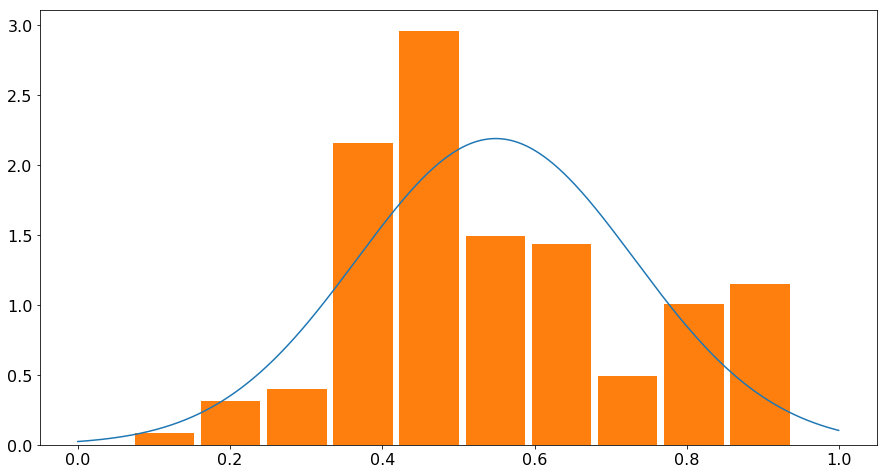

(205,)


In [281]:
from scipy import stats
sp_data = results['output_std'].loc[sp_index[:]]
sp_counts = len(results['output_std'].loc[sp_index[:]])
sp_mean = results['output_std'].loc[sp_index[:]].mean()
sp_std = results['output_std'].loc[sp_index[:]].std()
# 绘制概率密度分布图
x = np.arange(0, 1, 0.001)
# PDF是概率密度函数
y = stats.norm.pdf(x, loc=sp_mean, scale=sp_std)
plt.plot(x, y)
plt.hist(sp_data, bins=10, rwidth=0.9, normed=True)
plt.show()
print(results['output_std'].loc[sp_index[:]][results['output_std']<0.5].shape)

In [282]:
from scipy import stats
ci = 0.68
for i in range(11):
    conf_intveral = stats.norm.interval(ci, loc=sp_mean, scale=sp_std) #數字為信賴區間
    ci += 0.02
    print(conf_intveral)
    t=[]
    t = sp_data[sp_data<conf_intveral[1]]
    t = t[t>conf_intveral[0]]
    RN = results
    RN = RN[(~RN.index.isin(sp_index))] #去除U中的SP
    RN_index = RN['output_std'][RN['output_std']>=max(t)].index
    print(1-np.int_(RN['truth'].loc[RN_index[:]]).mean())
    
    
# 函数曲线下68.268949%的面积在平均数左右的一个标准差范围内

# 函数曲线下95.449974%的面积在平均数左右两个标准差的范围内

# 函数曲线下99.730020%的面积在平均数左右三个标准差的范围内

# 函数曲线下99.993666%的面积在平均数左右四个标准差的范围内

(0.36766107342092813, 0.7298348160411623)
0.8527298850574713
(0.3600174987326765, 0.7374783907294138)
0.8527298850574713
(0.35202603951313916, 0.7454698499489512)
0.8576388888888888
(0.3436365479861676, 0.7538593414759228)
0.8623304652180254
(0.334787468778862, 0.7627084206832284)
0.8669307511737089
(0.32540199556482796, 0.7720938938972625)
0.8736296296296296
(0.3153824424354542, 0.7821134470266362)
0.882529668018627
(0.3046017236154732, 0.7928941658466171)
0.8842041861165487
(0.2928899369468896, 0.8046059525152007)
0.8954810943744236
(0.28001219984667497, 0.8174836896154154)
0.9070935342121783
(0.26562978498315387, 0.8318661044789365)
0.9139612985766832


In [283]:
max(sp_data)

0.9393060545612129

In [284]:
t = sp_data[sp_data<0.9680286807189155]
t = t[t>0.538615192344655]
max(t)

0.9393060545612129

In [285]:
RN = results
RN = RN[(~RN.index.isin(sp_index))] #去除U中的SP
RN_index = RN['output_std'][RN['output_std']>=max(t)].index
1-np.int_(RN['truth'].loc[RN_index[:]]).mean()

0.9891944990176817

In [286]:
RN_index.shape

(3054,)

# 下面是將test資料轉換為矩陣

In [287]:
test_data = pd.DataFrame({
    'text'      : test_set,   # 真實標籤
    'label'      : testlabel,        # 預測標籤
}, columns = ['text', 'label'])

In [288]:
#將測試及轉為稀疏矩陣，是舊的TFIDF
test_data_matrix = raw2feature(test_data,keyword_dict)

In [289]:
def test_func(test,testlabel,model):
    Y_hat = model.predict(test)
    n=np.size(testlabel)
    print ('Testing Accuarcy: {:.2f}％ ({})'.format(sum(np.int_(Y_hat==testlabel))*100./n,model.__module__))
# Test Model using testing data

test_func(test_data_matrix[0],test_data_matrix[1],logistic)

Testing Accuarcy: 78.62％ (sklearn.linear_model.logistic)


# 下面是提取RN後用P和RN重新訓練

In [290]:
all_data.loc[positive_train]
all_data.loc[RN_index]
all_data['label'].loc[sp_index] = '1'
new_all_data=[]
new_all_data = pd.concat([all_data.loc[positive_train],all_data.loc[RN_index]])

In [291]:
new_keyword_dict=generate_key_list(all_data, size_table, word_len_ignored) #TFIDF

In [292]:
new_all_data_matrix = raw2feature(new_all_data,keyword_dict)

from sklearn.linear_model import LogisticRegression

logisticpu = LogisticRegression()

logisticpu.fit(new_all_data_matrix[0], new_all_data_matrix[1])

C:\Users\zxc98\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [293]:
test_func(test_data_matrix[0],test_data_matrix[1],logisticpu)

Testing Accuarcy: 86.48％ (sklearn.linear_model.logistic)


In [235]:
all_data['label'][all_data['label']=="1"].shape

(4005,)

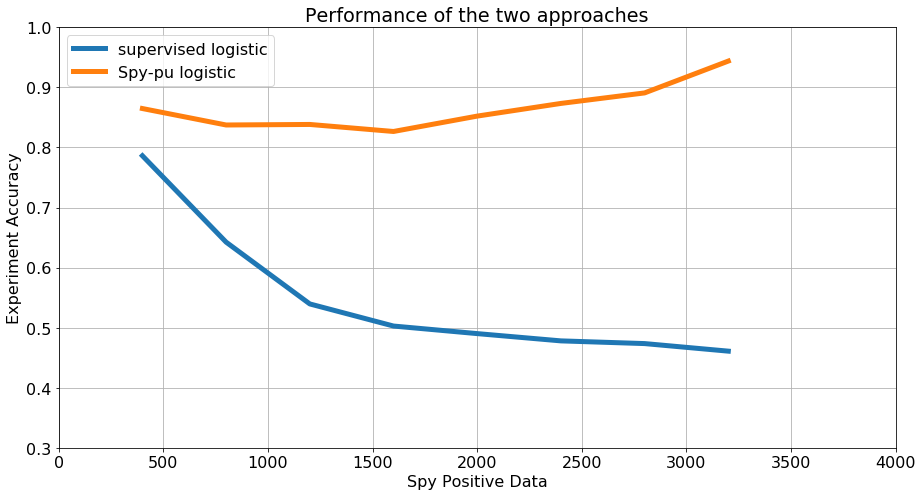

In [296]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 15, 8
x = [400, 800, 1200, 1600,2000,2400,2800,3200]
y_std = [0.7862, 0.6424, 0.5395, 0.5027,0.4901,0.4780,0.4735,0.4609]
y_stdpu = [0.8648, 0.8374, 0.8383, 0.8266,0.8522,0.8733,0.8908,0.9438]
plt.xlim(0, 4000)
plt.ylim(0.3, 1)
plt.plot(x, y_std, marker='', mec='b', mfc='w' ,lw = 5)
plt.plot(x, y_stdpu, marker='', mec='b', mfc='w' ,lw = 5)
plt.legend([
    'supervised logistic', 
    'Spy-pu logistic'
])  # 让图例生效
# plt.xticks(x, names, rotation=45)
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"Spy Positive Data") #X轴标签
plt.ylabel("Experiment Accuracy") #Y轴标签
plt.title("Performance of the two approaches") #标题
plt.savefig("classifier ")
plt.grid()
plt.show()